In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%ls data

2019-06-06CM_ch25.npy  data.txt


(Text(0.5, 0, 'Time (sec)'), Text(0, 0.5, 'Voltage ($\\mu$Volts)'))

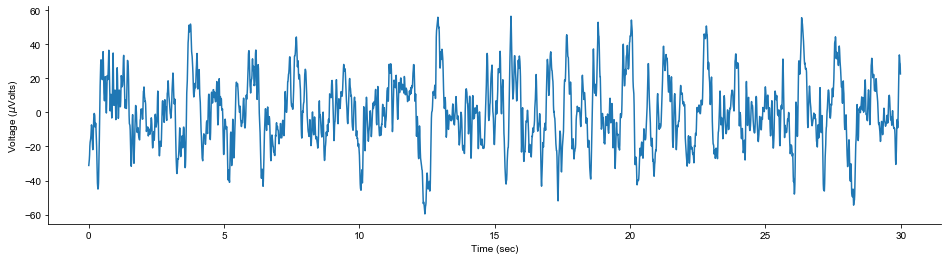

In [3]:
data = np.loadtxt('data/data.txt')
sf = 100 # samples per second
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(np.arange(data.size)/sf, data)
plt.xlabel('Time (sec)'), plt.ylabel('Voltage ($\mu$Volts)')

 to take a window sufficiently long to encompasses at least two full cycles of the lowest frequency of interest. In our case, our lowest frequency of interest is 0.5 Hz so we will choose a window of 
2/0.5=4 seconds.

(0, 50.0)

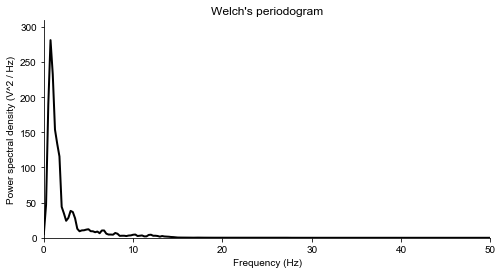

In [4]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum

plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
